<a href="https://colab.research.google.com/github/tapasmeher10/MLnow_2.0/blob/main/3.1_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Date Created**: June 12, 2021

Topic:Univariate Linear Regression

**Author**:
Tapas Meher

[[Course Repository](https://github.com/tapasmeher10/MLnow_2.0)]


## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd '/content/drive/MyDrive/student'

/content/drive/MyDrive/student


In [5]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [6]:
import os

In [7]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [8]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [9]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [10]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [11]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [12]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv
student-merge.R  student.txt


## Data visualization

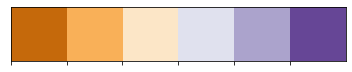

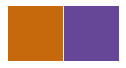

In [13]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [14]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

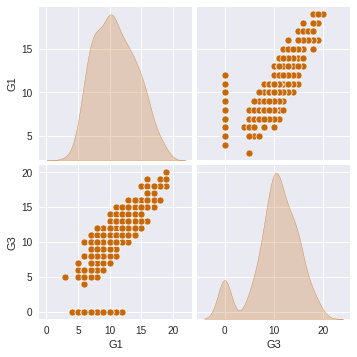

In [15]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [16]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [17]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [18]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [19]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [20]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [21]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [22]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [25]:
numEpochs = 200
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/200
10/10 [==============================] - 0s 4ms/step - loss: 1.8573 - mae: 1.8573 - mse: 8.4347 - val_loss: 1.6075 - val_mae: 1.6075 - val_mse: 6.3308
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 1.8566 - mae: 1.8566 - mse: 8.4289 - val_loss: 1.6084 - val_mae: 1.6084 - val_mse: 6.3347
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 1.8566 - mae: 1.8566 - mse: 8.4374 - val_loss: 1.6111 - val_mae: 1.6111 - val_mse: 6.3463
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 1.8562 - mae: 1.8562 - mse: 8.4381 - val_loss: 1.6103 - val_mae: 1.6103 - val_mse: 6.3425
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 1.8563 - mae: 1.8563 - mse: 8.4414 - val_loss: 1.6114 - val_mae: 1.6114 - val_mse: 6.3469
Epoch 6/200
10/10 [==============================] - 0s 3ms/step - loss: 1.8561 - mae: 1.8561 - mse: 8.4405 - val_loss: 1.6105 - val_mae: 1.6105 - val_mse: 6.3427
Epoch 7/200
10/10 [===

In [26]:
print(history)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


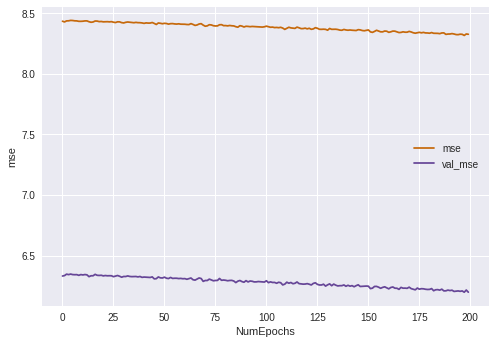

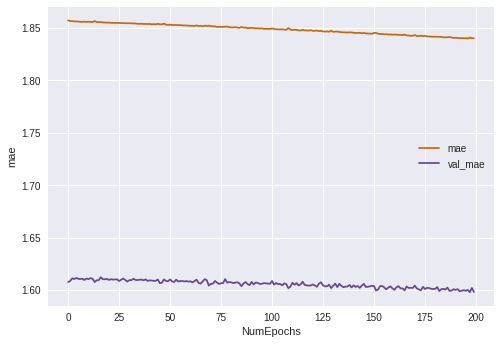

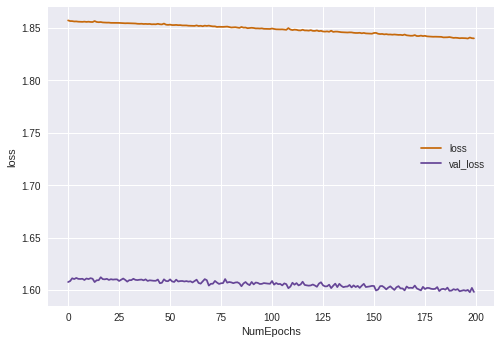

In [28]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [29]:
model.predict([1])

array([[1.1370087]], dtype=float32)

In [30]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.1370087]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.1370087]
 [2.123738 ]
 [3.1104674]
 [4.0971966]
 [5.083926 ]]

List of Predictions (flattened out):
[1.1370087 2.123738  3.1104674 4.0971966 5.083926 ]



In [31]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [32]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [33]:
print(len(testPreds))
print(testPreds)

79
[13.96449    6.070656  11.004302  16.924679  16.924679  11.991032
 13.96449   18.898138  18.898138   8.044114  13.96449   12.977761
  8.044114   7.0573845  9.030844  12.977761  11.004302  15.937949
  7.0573845 10.017573  14.95122   12.977761  13.96449   15.937949
  7.0573845  7.0573845  8.044114  10.017573  11.991032  10.017573
 11.991032  12.977761  10.017573   6.070656   9.030844  11.991032
  7.0573845  8.044114  13.96449    9.030844   9.030844   7.0573845
 11.991032   6.070656  12.977761   7.0573845  7.0573845 11.004302
 12.977761  16.924679  11.991032  14.95122    9.030844  11.991032
 14.95122   11.991032  14.95122   11.991032  14.95122   11.004302
 11.991032   8.044114  15.937949   7.0573845 15.937949  11.004302
 15.937949  12.977761   8.044114   8.044114  11.991032  17.91141
 12.977761  15.937949  10.017573   7.0573845 10.017573   7.0573845
 11.004302 ]


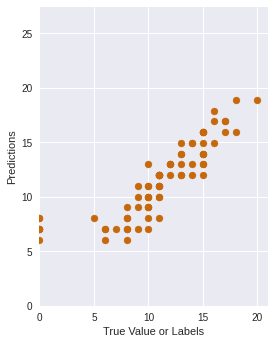

In [34]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

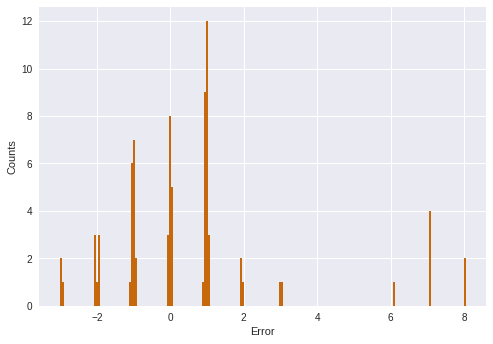

In [35]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)